# Fuel consumption linear regression
Using scipy

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [10]:
!wget -O /resources/FuelConsumption.csv https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv

--2015-10-05 11:58:39--  https://ibm.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
Resolving ibm.box.com... 74.112.184.85, 74.112.185.182
Connecting to ibm.box.com|74.112.184.85|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ibm.app.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv [following]
--2015-10-05 11:58:39--  https://ibm.app.box.com/shared/static/ez95yurarnp0q31l9jl1ma51mh6qtxj2.csv
Resolving ibm.app.box.com... 74.112.184.87, 74.112.185.87
Connecting to ibm.app.box.com|74.112.184.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.boxcloud.com/d/1/wZhk8fgBu-PtVjtED5FGhGVIuvSkfP14XoPlXWc3_xVYD2cBqAas-6_KaonKiJG0GAzEquOgPm1-bY7ss_KD7kaTE-WzdvBgOzAHuLh15XpQ1lZXwctyb8gJLxQHO2frKtPFgw5LyC_IOAvG5UrfzV8kp7uQ59A5kWfvsd6O2nbsiS9pBETHTRVEhBIC8Xpj5QH4tMGKbOR4iOXMKNz140_evtaVTNcOE0NIFzfbwhmMTraQ0mYC9BpqIot2wkPFt3RNlBuiqYa_d-UCm1WJqkvXzErsKhcHu11q9dNWLLJbIk1rJz15vrjXPZ0RBkzCDVNbXb4IGro_Cq

In [11]:
df = pd.read_csv("/resources/FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


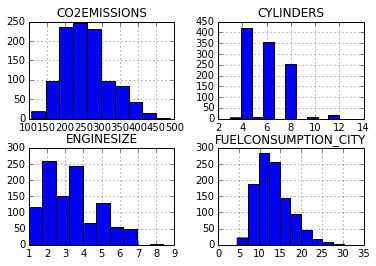

In [13]:
viz=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()

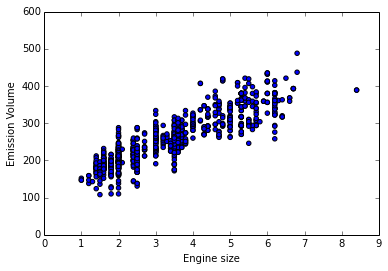

In [14]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission Volume")
plt.show()

polyfit --> Least squares polynomial fit  
Degree of the fitting polynomial=1

In [17]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df.ENGINESIZE,df.CO2EMISSIONS)
print slope, intercept, r_value, p_value, std_err 
print "r-squared:", r_value**2

39.1251997867 125.304099495 0.874154368396 0.0 0.666063115247
r-squared: 0.764145859785


In [20]:
fit = np.polyfit(df.ENGINESIZE, df.CO2EMISSIONS, deg=1,full=True)
df['predicted']=fit_fn(df.ENGINESIZE)
print 'slope:',fit[0][0]
print 'intercept:',fit[0][1]
print 'residuals (sum of the squares of the fit errors):',fit[1] 
print 'singular values:', fit [3]
print 'conditioning threshold:',fit[4]

slope: 39.1251997867
intercept: 125.304099495
residuals (sum of the squares of the fit errors): [ 1009717.09425104]
singular values: [ 1.3860078   0.28103804]
conditioning threshold: 2.36921593455e-13


SST is the total sum of squares  
SSR is the regression sum of squares   
SSE is the sum of squared errors  
In some texts, the abbreviations SSR and SSE have the opposite meaning: SSR stands for the residual sum of squares (which then refers to the sum of squared errors in the upper example) and SSE stands for the explained sum of squares (another name for the regression sum of squares).

In [29]:
SST=np.sum((df.CO2EMISSIONS-np.average(df.CO2EMISSIONS))**2)
print 'total sum of squares::::', SST
SSR=np.sum((df.predicted-np.average(df.CO2EMISSIONS))**2)
print 'regression sum of squares::::', SSR
SSE=np.sum((df.CO2EMISSIONS-df.predicted)**2)
print 'sum of squared errors::::', SSE
R2=SSR/SST
print 'r-squar::::', R2

total sum of squares:::: 4281108.20244
regression sum of squares:::: 3271391.10819
sum of squared errors:::: 1009717.09425
r-squar:::: 0.764145859785


slope: 39.1251997867
intercept: 125.304099495
residuals (sum of the squares of the fit errors): [ 1009717.09425104]
singular values: [ 1.3860078   0.28103804]
conditioning threshold: 2.36921593455e-13
 
39.13 x + 125.3


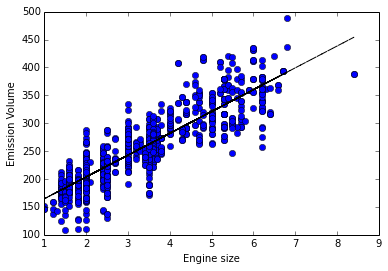

In [16]:


fit_fn = np.poly1d(fit[0]) # param: The polynomial’s coefficients
print fit_fn 
plt.plot(df.ENGINESIZE, df.CO2EMISSIONS, 'bo', df.ENGINESIZE, fit_fn(df.ENGINESIZE), '--k')
plt.xlabel("Engine size")
plt.ylabel("Emission Volume")
plt.show()